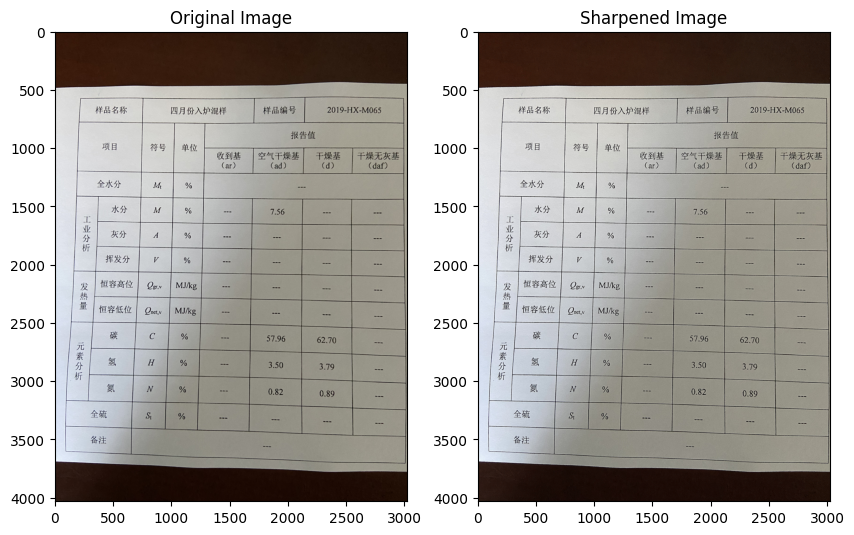

In [12]:
import cv2
import matplotlib.pyplot as plt

# 加载图像
img = cv2.imread('/hy-tmp/table-detect/img/single_img/image113.jpg')

# 边缘增强锐化
kernel = np.array([[0, -2, 0], [-2, 9, -2], [0, -2, 0]])
sharp = cv2.filter2D(img, -1, kernel)

# 显示图像
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 40))
axs[0].imshow(img[...,::-1])
axs[0].set_title('Original Image')
axs[1].imshow(sharp[...,::-1])
axs[1].set_title('Sharpened Image')
plt.show()
